# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [24]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

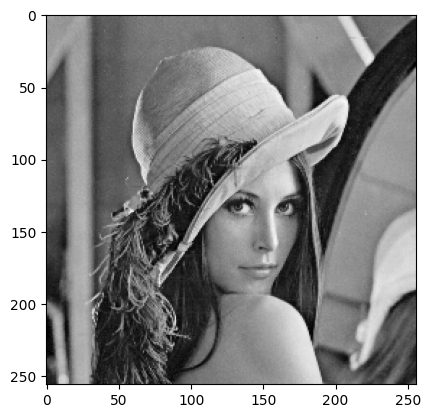

In [25]:
img = plt.imread('data/lena.png')
plt.imshow(img)
plt.imshow(img, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [26]:
#numpy.zeros: Return a new array of given shape and type, filled with zeros

#if size % 2 == 0:
#    print('Size must be an odd number')
#    exit 


def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if n <= p[0] < img.shape[0] - n and n <= p[1] < img.shape[1] - n:
            for q in numpy.ndindex(size, size):
                q1 = q[1] + p[1] - n
                q0 = q[0] + p[0] - n
                neighborhood_sum = neighborhood_sum + img[q0,q1]
        intensity = neighborhood_sum/size**2
        result[p] = intensity
         
    return result


**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

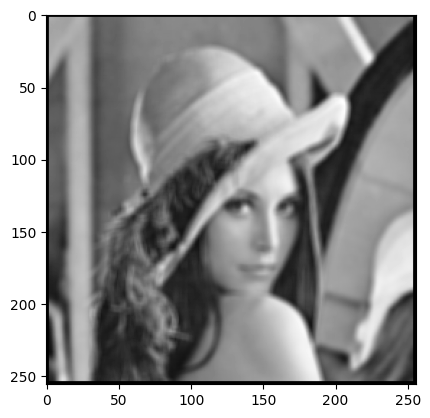

In [27]:
meanfilter_image = meanfilter(img, 5)
plt.imshow(meanfilter_image)
plt.imshow(meanfilter_image, 'gray')


**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

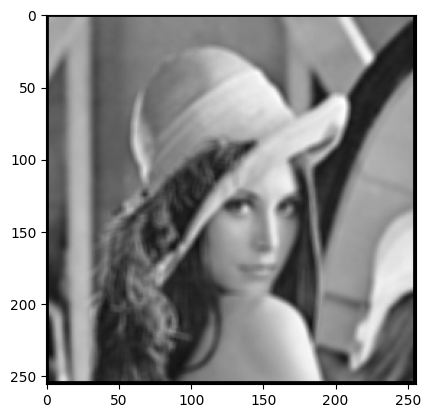

In [28]:
img_filter5 = plt.imread('data/lena_meanfilter5.png')
plt.imshow(img_filter5)
plt.imshow(img_filter5, 'gray')

In [29]:
assert numpy.allclose(meanfilter, img_filter5, atol=1/255)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [ ]:
import statistics

def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    mid = size**2//2
    for p in numpy.ndindex(img.shape):
        neighborhood = []
        if n <= p[0] < img.shape[0] - n and n <= p[1] < img.shape[1] - n:
            for q in numpy.ndindex(size, size):
                q1 = q[1] + p[1] - n
                q0 = q[0] + p[0] - n
                neighborhood.append(img[q0,q1])
            neighborhood.sort()
            intensity = neighborhood[mid]
            result[p] = intensity

    return result


**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

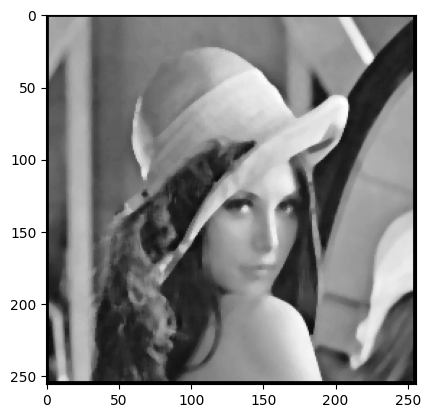

In [ ]:
img_median = medianfilter(img, 5)
plt.imshow(img_median)
plt.imshow(img_median, 'gray')

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

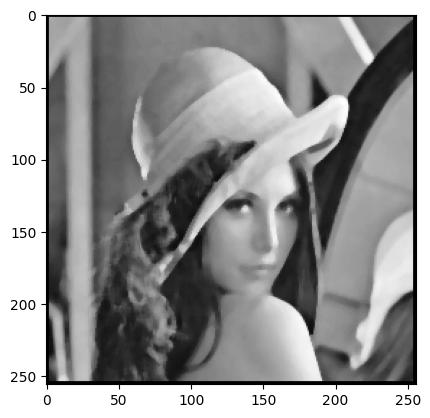

In [ ]:
img_median5 = plt.imread('data/lena_medianfilter5.png')
plt.imshow(img_median5)
plt.imshow(img_median5, 'gray')

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [32]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

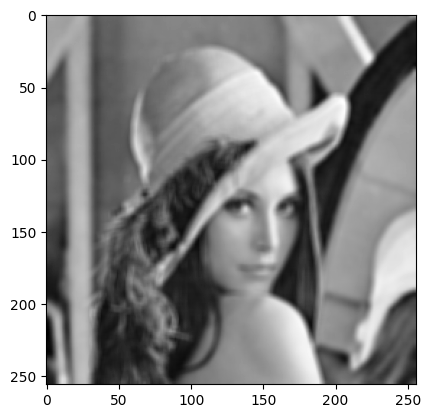

In [ ]:

scipy_mean = scipy.ndimage.uniform_filter(img,5)
plt.imshow(scipy_mean)
plt.imshow(scipy_mean, 'gray')


**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

In [31]:
scipy_median = scipy.ndimage.median_filter(img,5)
plt.imshow(scipy_median)
plt.imshow(scipy_median, 'gray')

NameError: name 'scipy' is not defined

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

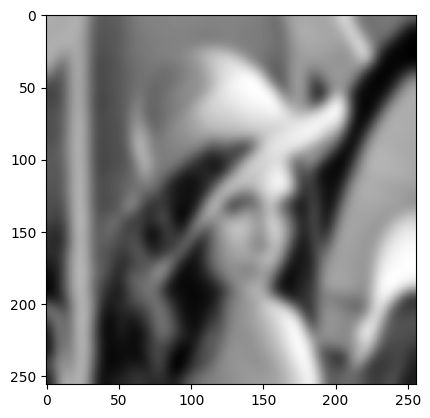

In [ ]:
scipy_gaussian = scipy.ndimage.gaussian_filter(img,5)
plt.imshow(scipy_gaussian)
plt.imshow(scipy_gaussian, 'gray')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

In [ ]:
#the border is not amplified
#pixels p with the intensity 1 (black) at the border are not taken into calculation 

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if n <= p[0] < img.shape[0] - n and n <= p[1] < img.shape[1] - n:
            i0 = p[0]-n
            i1 = p[0]+n+1
            j0 = p[1]-n
            j1 = p[1]+n+1
            neighborhood = img[i0:i1, j0:j1]
            intensity = neighborhood.mean()
            result[p] = intensity
    return result



**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

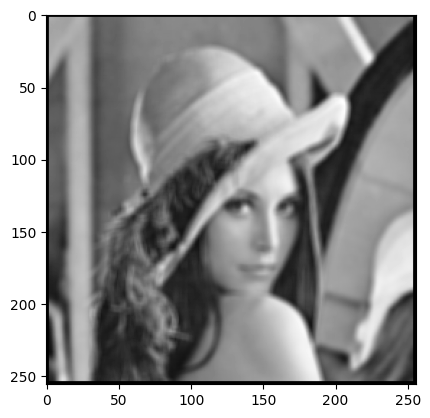

In [ ]:
fast = fastfilter(img, 5)
plt.imshow(fast)
plt.imshow(fast, 'gray')

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [ ]:
assert numpy.allclose(fast, img_filter5, atol=1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [ ]:
%timeit fastfilter(img, 9)

%timeit medianfilter(img, 9)

%timeit meanfilter(img, 9)

498 ms ± 54.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.29 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.44 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

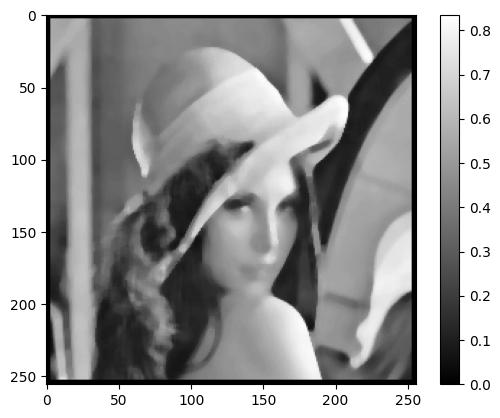

In [35]:
import scipy.ndimage

n=3 
N = 2*n + 1

img = plt.imread('data/lena.png')
results = numpy.zeros(img.shape)

for p in numpy.ndindex(img.shape[0]-2*n, img.shape[1]-2*n):
    values = img[p[0]:p[0]+N, p[1]: p[1]+N]
    values = values.flatten()
    values.sort(0)
    intensity = values[len(values)//2]
    results[p[0]+n, p[1]+n] = intensity




plt.figure()
plt.imshow(results,'gray')
plt.colorbar()




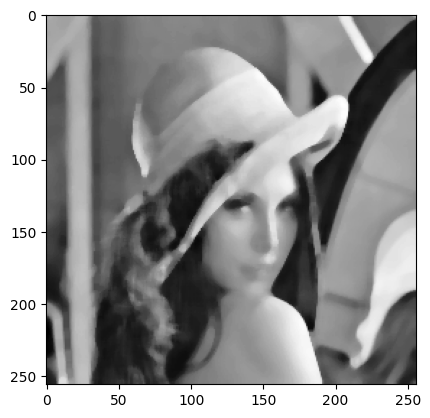

In [34]:
scipy_median = scipy.ndimage.median_filter(img,7)
plt.imshow(scipy_median)
plt.imshow(scipy_median, 'gray')